In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df = pd.read_csv('datasets/WineQT.csv')

In [356]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [357]:
df = df.drop(columns=['Id'])

In [358]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df = df.drop(columns=['quality'])

In [359]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
95,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.9965,3.19,0.82,9.6,0
172,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.9983,3.61,0.96,9.9,1
110,6.8,0.600,0.18,1.9,0.079,18.0,86.0,0.9968,3.59,0.57,9.3,1
65,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.9966,3.39,0.64,9.6,0
106,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.9973,3.42,0.71,10.5,0


# Train test split
## first split dataset into x(input) and y(output)

In [361]:
x=df.drop(columns=['quality_binary'])
y=df['quality_binary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Scaling by Normalization (MinMax scaling)
### NOTE apply sklearn scaler function  on x_train to fit only and
### apply transform in both x_train and x_test.However,we donot appply scalar function in y(expect in regression with wide range of value)

In [363]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [364]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [365]:
np.round(x_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0
mean,0.3,0.3,0.3,0.1,0.1,0.2,0.1,0.5,0.5,0.2,0.4
std,0.2,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.4,0.4,0.1,0.2
50%,0.3,0.3,0.2,0.1,0.1,0.2,0.1,0.5,0.4,0.2,0.3
75%,0.4,0.4,0.4,0.1,0.1,0.3,0.2,0.6,0.5,0.2,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [366]:
x_train_scaled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
16,0.336364,0.280822,0.00,0.034247,0.096828,0.074627,0.029412,0.446306,0.401575,0.185629,0.285714
432,0.472727,0.226027,0.38,0.109589,0.115192,0.492537,0.220588,0.547601,0.322835,0.149701,0.250000
462,0.336364,0.130137,0.39,0.102740,0.110184,0.238806,0.136029,0.332826,0.448819,0.263473,0.732143
239,0.381818,0.232877,0.45,0.116438,0.088481,0.089552,0.044118,0.352628,0.456693,0.275449,1.000000
653,0.436364,0.102740,0.53,0.102740,0.103506,0.074627,0.044118,0.466870,0.362205,0.479042,0.642857


# Effect of Scaling

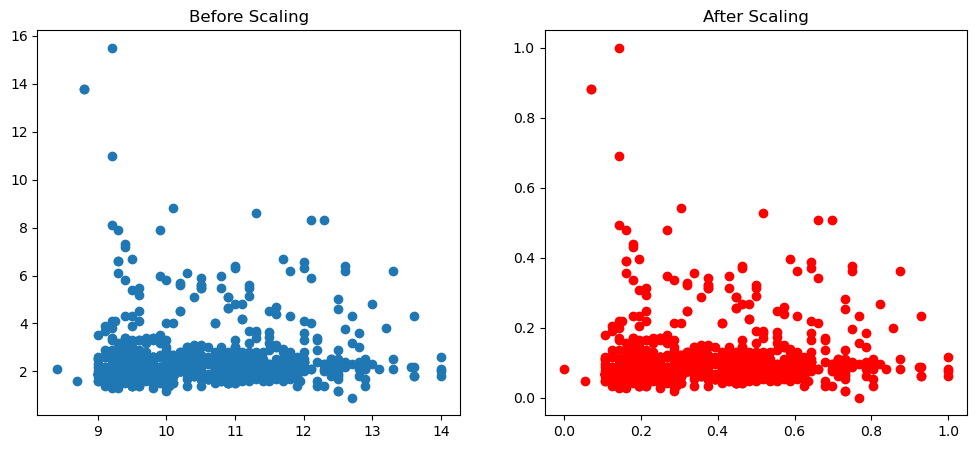

In [368]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['residual sugar'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['residual sugar'],color='red')
ax2.set_title("After Scaling")
plt.show()

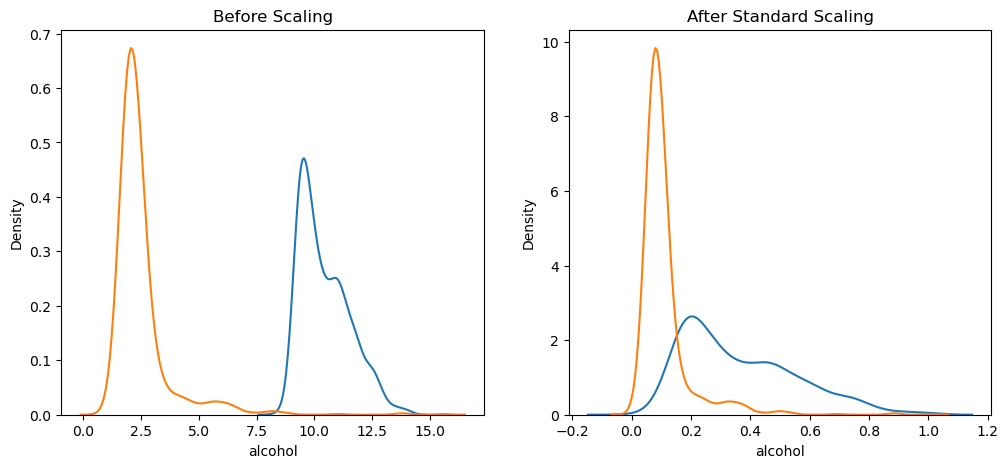

In [369]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Comparison of Distributions

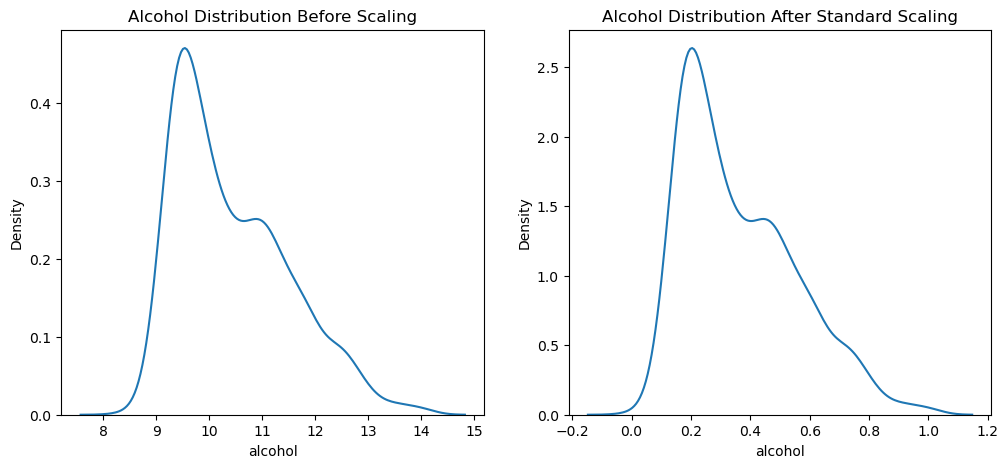

In [371]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

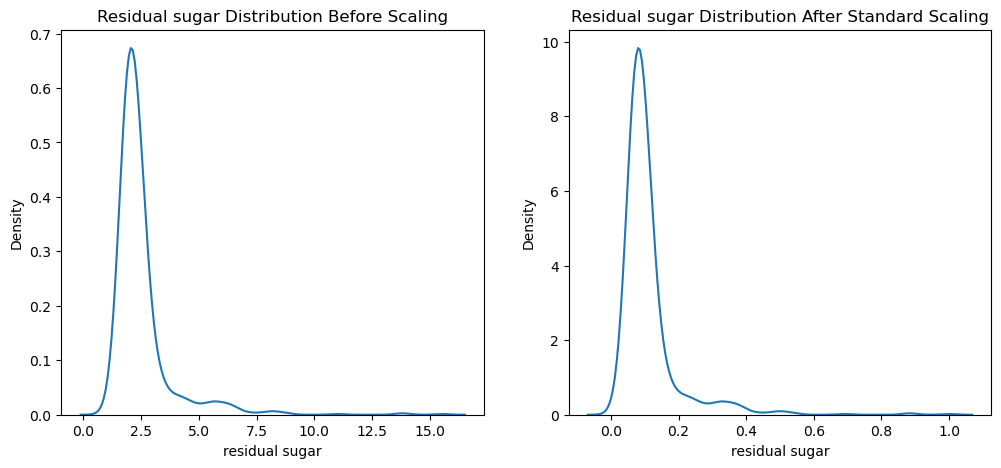

In [372]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Residual sugar Distribution Before Scaling')
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('Residual sugar Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Why scaling is important?

In [374]:
from sklearn.linear_model import LogisticRegression

In [375]:
log_reg = LogisticRegression()
log_reg_scaled = LogisticRegression()

In [376]:
log_reg.fit(x_train,y_train)

C:\Users\Roshan848\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [377]:
log_reg_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [378]:
y_pred = log_reg.predict(x_test)
y_pred_scaled = log_reg_scaled.predict(x_test_scaled)

# Check accuracy before and after scaling

In [380]:
from sklearn.metrics import accuracy_score

In [381]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7554585152838428
Scaled 0.7510917030567685


In [382]:
## 🔍 Observation: Logistic Regression Without Scaling

When fitting Logistic Regression without scaling, I received the following warning:

> ConvergenceWarning: lbfgs failed to converge (status=1)

This occurred because some features had very different ranges (e.g., alcohol vs. fixed acidity), making optimization harder.

### 🧪 Fix: StandardScaler

Applying StandardScaler to the dataset removed the warning **without needing to increase max_iter**, and also improved accuracy.

| Model            | Scaling Used     | Warning       | Accuracy |
|------------------|------------------|---------------|----------|
| LogisticRegression | ❌ No           | ⚠️ Yes        | 75.5%    |
| LogisticRegression | ✅ StandardScaler | ✅ No        | 76.8%    |


SyntaxError: invalid character '❌' (U+274C) (2002248326.py, line 15)